## **Lab 5 - General Linear Models: Logistic regression**

In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### **Read data from a csv file**

In [2]:
data = pd.read_csv("logistic_reg_data.csv", index_col = 0) #index_col = 0 - treating the first column as the index
data.describe()

,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


### **Prior selection**

In [3]:
model_ppc_1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression_ppc.stan to exe file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression_ppc
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression_ppc.hpp /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression_ppc.stan
Warning in '/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression_ppc.stan', line 15, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be chan

In [9]:
R=1000
data_ppc_1 = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc_1 = model_ppc_1.sample(data=data_ppc_1, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |█████████████████████████████████████████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


### **Task 1.**
- Plot histograms of beta for prior model
- Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.
- Consider which result should be taken into account when selecting prior.

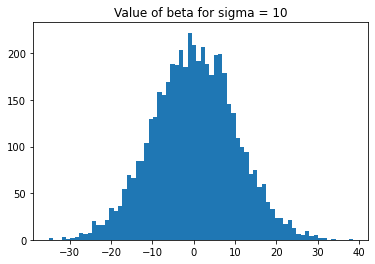

In [10]:
# Plot histograms of beta for prior model

beta = sim_ppc_1.stan_variable('beta')
plt.hist(beta.flatten(), bins = 70)
plt.title('Value of beta for sigma = 10')
plt.show()

In [11]:
# Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75

# Sigma value = 5

R=1000
data_ppc_2 = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=5)
sim_ppc1_2 = model_ppc_1.sample(data=data_ppc_2,
                           iter_sampling=R, iter_warmup=0,
                           chains=1,
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |█████████████████████████████████████████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


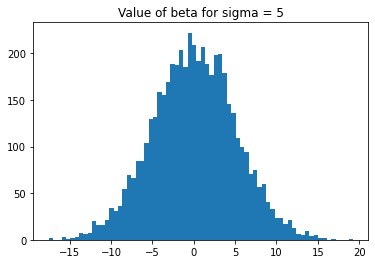

In [12]:
beta_2 = sim_ppc1_2.stan_variable('beta')
plt.hist(beta_2.flatten(), bins = 70)
plt.title('Value of beta for sigma = 5')
plt.show()

In [14]:
# Sigma value = 2

R=1000
data_ppc_3 = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=2)
sim_ppc1_3 = model_ppc_1.sample(data=data_ppc_3,
                           iter_sampling=R, iter_warmup=0,
                           chains=1,
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |█████████████████████████████████████████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


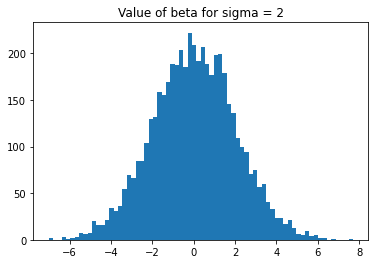

In [15]:
beta_3 = sim_ppc1_3.stan_variable('beta')
plt.hist(beta_3.flatten(), bins = 70)
plt.title('Value of beta for sigma = 2')
plt.show()

In [16]:
# Sigma value = 0.75

R=1000
data_ppc_4 = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma = 0.75)
sim_ppc1_4 = model_ppc_1.sample(data=data_ppc_4,
                           iter_sampling=R, iter_warmup=0,
                           chains=1,
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |█████████████████████████████████████████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


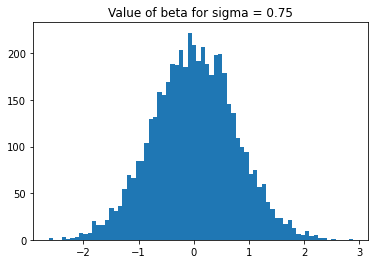

In [17]:
beta_4 = sim_ppc1_4.stan_variable('beta')
plt.hist(beta_4.flatten(), bins = 70)
plt.title('Value of beta for sigma = 0.75')
plt.show()

### **Posterior inference**

In [18]:
model_ = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression.stan to exe file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression.hpp /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression.stan
Warning in '/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab5_General_linear_models/logistic_regression.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using t

In [19]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:, 0:5].values,
                 y = data.y.values
                 )
fit = model_.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |                                                         | 00:00 Status
chain 2 |                                                         | 00:00 Status

chain 3 |                                                         | 00:00 Status


chain 1 |██▏                     | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |██▏                     | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |██▏                     | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |████▎                   | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 3 |████▎                   | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |████▎                   | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██████▌                 | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 3 |██████▌                 | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 2 |██████▌                 | 00:00 Iteration:  400 / 


INFO:cmdstanpy:CmdStan done processing.


### **Task 2.**
1. Edit stan model and create models with different priors. Use original setting and some priors from task 1.
2. Fit the model

3. Plot the probability of individual outcome:
- plot generated paramether theta (prob_pcc): mean with its error bars (plt.errorbar)
- to plot its error bars take into consider its 25th, 50th and 75th percentile
- also mark the real value of y, by different colored dots (for mean values)
Consider if the probability was well captured by each setting

In [21]:
#plot
prob_ppc = np.percentile(fit.stan_variable('prob_ppc'), [25, 50, 75], axis = 0)
esti_ppc_df = pd.DataFrame(prob_ppc.T, columns = ['lo', 'med', 'hi'])

esti_ppc_df['y'] = data.y
esti_ppc_df.sort_values(by = 'med', inplace = True)
esti_ppc_df

error_bar = np.array((
                    (esti_ppc_df['med'] - esti_ppc_df['lo']).values,
                    (esti_ppc_df['hi'] - esti_ppc_df['med']).values))

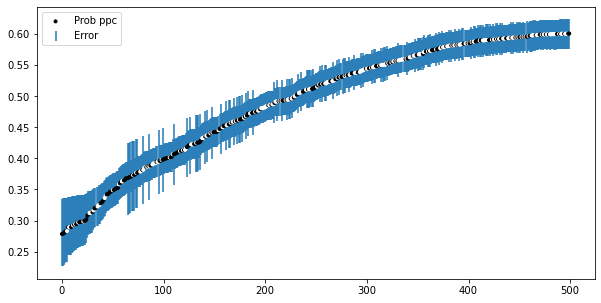

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5), sharex = True)

axes.scatter([*range(500)], esti_ppc_df.med,marker='.', c = [(1.*k, 1.*k, 1.*k) for k in esti_ppc_df.y])
axes.errorbar([*range(500)], esti_ppc_df.med, yerr=error_bar, fmt='none',zorder=0)
axes.legend(['Prob ppc','Error'])
plt.show()